# Market Analysis in Dublin

## Assignment
A new city manager for Airbnb has started in Dublin and wants to better understand:

what guests are searching for in Dublin,
which inquiries hosts tend to accept.
Based on the findings the new city manager will try to boost the number and quality of hosts in Dublin to fit the demands from guests. The goal of this challenge is to analyze, understand, visualize, and communicate the demand / supply in the market. For example you may want to look at the breakdown of start date day of the week, or number of nights, or room type that is searched for, and how many hosts accepted the reservation. In particular, we are interested in:

what the gaps are between guest demand and host supply that the new city manager could plug to increase the number of bookings in Dublin,
what other data would be useful to have to deepen the analysis and understanding.


## Data Description
### There are 2 datasets

 * searches.tsv - Contains a row for each set of searches that a user does for Dublin
* contacts.tsv - Contains a row for every time that an assigned visitor makes an inquiry for a stay in a listing in Dublin
searches dataset contains the following columns:

-ds - Date of the search
- id_user - Alphanumeric user_id
- ds_checkin - Date stamp of the check-in date of the search
- ds_checkout - Date stamp of the check-out date of the search
- n_searches - Number of searches in the search set
- n_nights - The number of nights the search was for
- n_guests_min - The minimum number of guests selected in a search set
- n_guests_max - The maximum number of guests selected in a search set
- origin_country - The country the search was from
- filter_price_min - The value of the lower bound of the price filter, if the
  user used it
- filter_price_max - The value of the upper bound of the price filter, if the
   user used it
- filter_room_types - The room types that the user filtered by, if the user
  used the room_types filter
- filter_neighborhoods - The neighborhoods types that the user filtered by, if
     the user used the neighborhoods filter
- contacts dataset contains the following columns:


- id_guest - Alphanumeric user_id of the guest making the inquiry
- id_host - Alphanumeric user_id of the host of the listing to which the inquiry is made
- id_listing - Alphanumeric identifier for the listing to which the inquiry is made
- ts_contact_at - UTC timestamp of the moment the inquiry is made.
- ts_reply_at - UTC timestamp of the moment the host replies to the inquiry, if so
- ts_accepted_at - UTC timestamp of the moment the host accepts the inquiry, if so
- ts_booking_at - UTC timestamp of the moment the booking is made, if so
- ds_checkin - Date stamp of the check-in date of the inquiry
- ds_checkout - Date stamp of the check-out date of the inquiry
- n_guests - The number of guests the inquiry is for
- n_messages - The total number of messages that were sent around this inquiry

## Practicalities
Analyze the provided data and answer the questions to the best of your abilities. Include the relevant tables/graphs/visualization to explain what you have learnt about the market. Make sure that the solution reflects your entire thought process including the preparation of data - it is more important how the code is structured rather than just the final result or plot. You are expected to spend no more than 3-6 hours on this project.

#### To download the dataset <a href="https://drive.google.com/drive/folders/1WPZZB7WlOZE_lwVWJoR_V5AAR888uT9P?usp=sharing"> Click here </a>

In [3]:
import pandas as pd

# Load the datasets
searches_df = pd.read_csv('searches.tsv', sep='\t')
contacts_df = pd.read_csv('contacts.tsv', sep='\t')

# datetime format
searches_df['ds'] = pd.to_datetime(searches_df['ds'])
searches_df['ds_checkin'] = pd.to_datetime(searches_df['ds_checkin'], errors='coerce')
searches_df['ds_checkout'] = pd.to_datetime(searches_df['ds_checkout'], errors='coerce')

contacts_df['ts_contact_at'] = pd.to_datetime(contacts_df['ts_contact_at'])
contacts_df['ts_reply_at'] = pd.to_datetime(contacts_df['ts_reply_at'], errors='coerce')
contacts_df['ts_accepted_at'] = pd.to_datetime(contacts_df['ts_accepted_at'], errors='coerce')
contacts_df['ts_booking_at'] = pd.to_datetime(contacts_df['ts_booking_at'], errors='coerce')
contacts_df['ds_checkin'] = pd.to_datetime(contacts_df['ds_checkin'])
contacts_df['ds_checkout'] = pd.to_datetime(contacts_df['ds_checkout'])

# Handle missing values
searches_df_cleaned = searches_df.dropna(subset=['ds_checkin', 'ds_checkout', 'n_nights'])
contacts_df_cleaned = contacts_df.dropna(subset=['ts_contact_at', 'ds_checkin', 'ds_checkout'])


C:\Users\subramanya\AppData\Local\Temp\ipykernel_9976\2171655567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  searches_df_cleaned['checkin_day_of_week'] = searches_df_cleaned['ds_checkin'].dt.day_name()


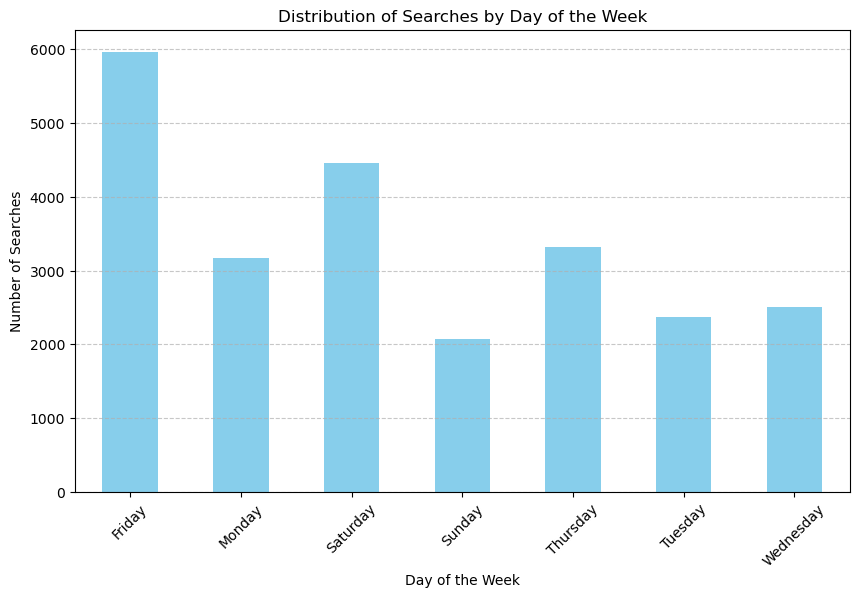

In [4]:
import matplotlib.pyplot as plt

# day of the week from ds_checkin
searches_df_cleaned['checkin_day_of_week'] = searches_df_cleaned['ds_checkin'].dt.day_name()

# number of searches by day of the week
searches_by_day = searches_df_cleaned['checkin_day_of_week'].value_counts().sort_index()

# distribution plot
plt.figure(figsize=(10, 6))
searches_by_day.plot(kind='bar', color='skyblue')
plt.title('Distribution of Searches by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Searches')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


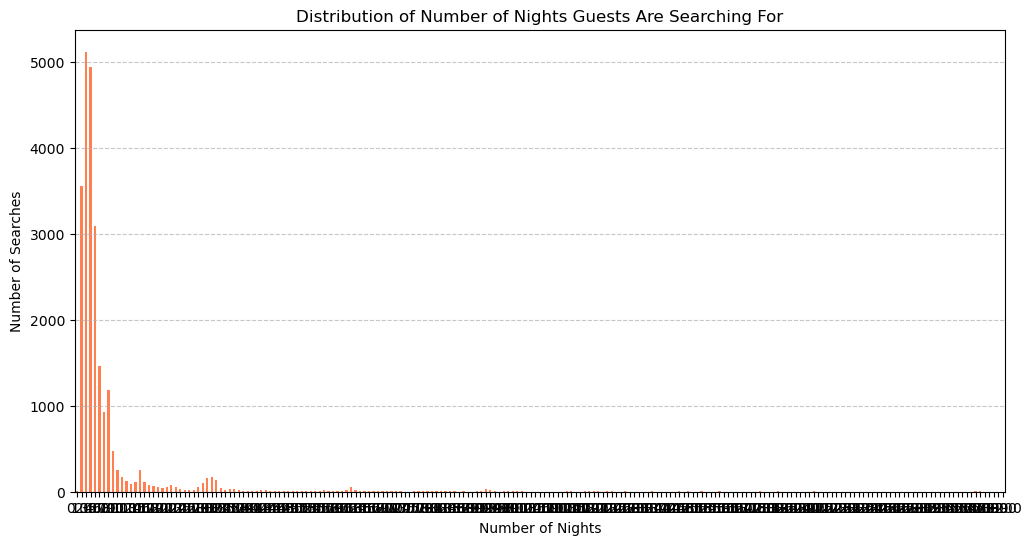

In [5]:
# distribution of the number of nights guests are searching for
nights_distribution = searches_df_cleaned['n_nights'].value_counts().sort_index()

# distribution plot
plt.figure(figsize=(12, 6))
nights_distribution.plot(kind='bar', color='coral')
plt.title('Distribution of Number of Nights Guests Are Searching For')
plt.xlabel('Number of Nights')
plt.ylabel('Number of Searches')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


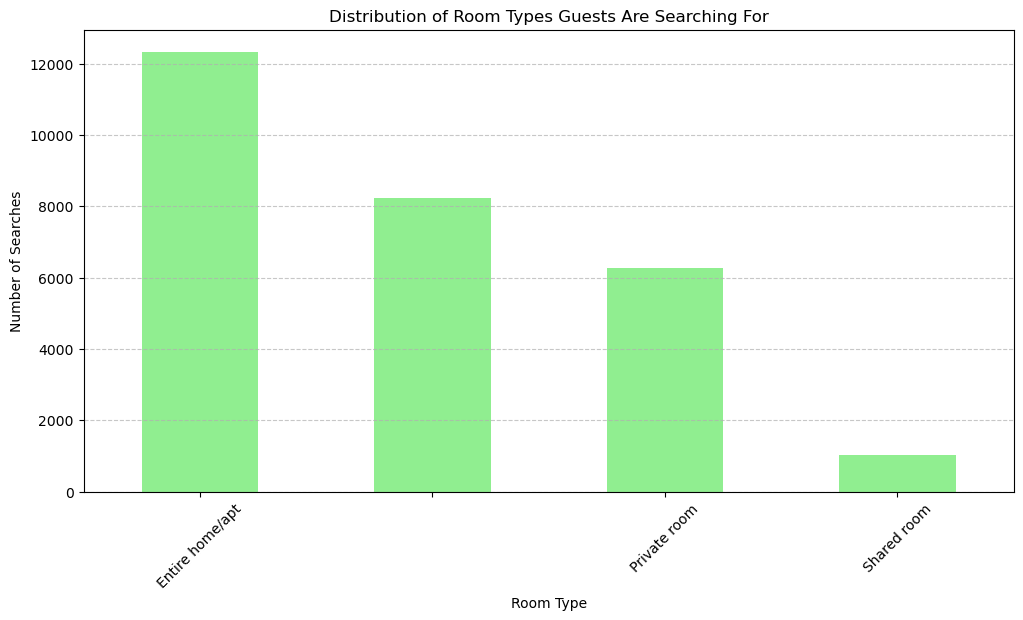

In [6]:
# count of room types
room_types_split = searches_df_cleaned['filter_room_types'].dropna().str.split(',', expand=True).stack()
room_types_distribution = room_types_split.value_counts()

# distribution plot
plt.figure(figsize=(12, 6))
room_types_distribution.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Room Types Guests Are Searching For')
plt.xlabel('Room Type')
plt.ylabel('Number of Searches')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\subramanya\AppData\Local\Temp\ipykernel_9976\439991826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_filtered_df['price_range'] = price_filtered_df.apply(lambda x: f"{int(x['filter_price_min'])}-{int(x['filter_price_max'])}", axis=1)


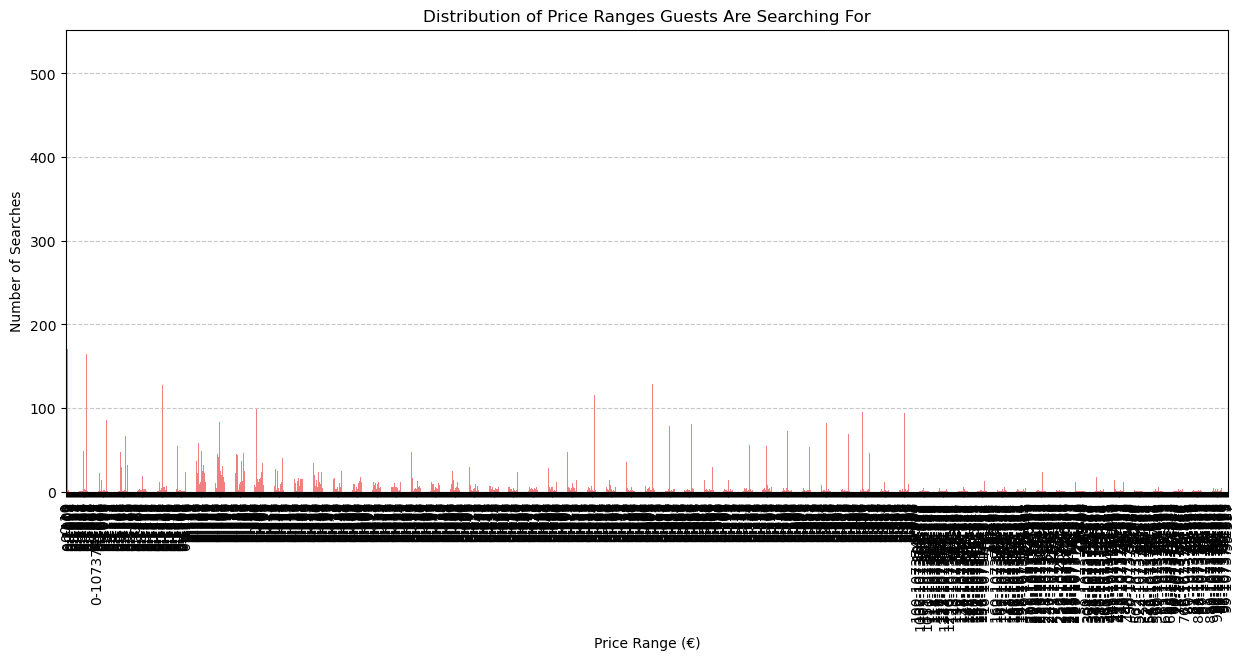

In [7]:
# Removeing entries with NaN values in price filters
price_filtered_df = searches_df_cleaned.dropna(subset=['filter_price_min', 'filter_price_max'])

# range column for visualization purposes
price_filtered_df['price_range'] = price_filtered_df.apply(lambda x: f"{int(x['filter_price_min'])}-{int(x['filter_price_max'])}", axis=1)

# Count the price ranges
price_range_distribution = price_filtered_df['price_range'].value_counts().sort_index()


plt.figure(figsize=(15, 6))
price_range_distribution.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Price Ranges Guests Are Searching For')
plt.xlabel('Price Range (€)')
plt.ylabel('Number of Searches')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


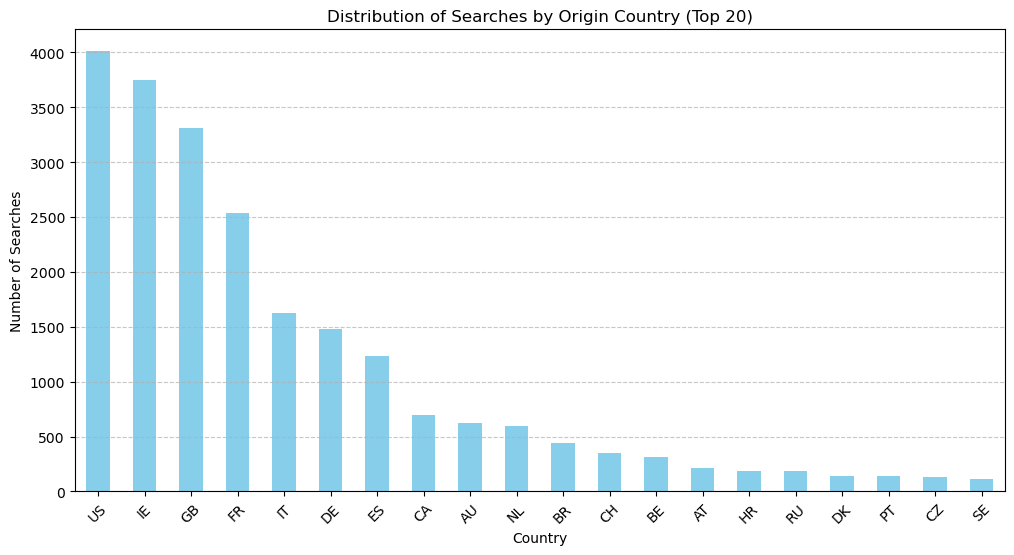

In [8]:
# number of searches by origin country
origin_country_distribution = searches_df_cleaned['origin_country'].value_counts().head(20)  # Display top 20 countries


plt.figure(figsize=(12, 6))
origin_country_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Searches by Origin Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Number of Searches')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


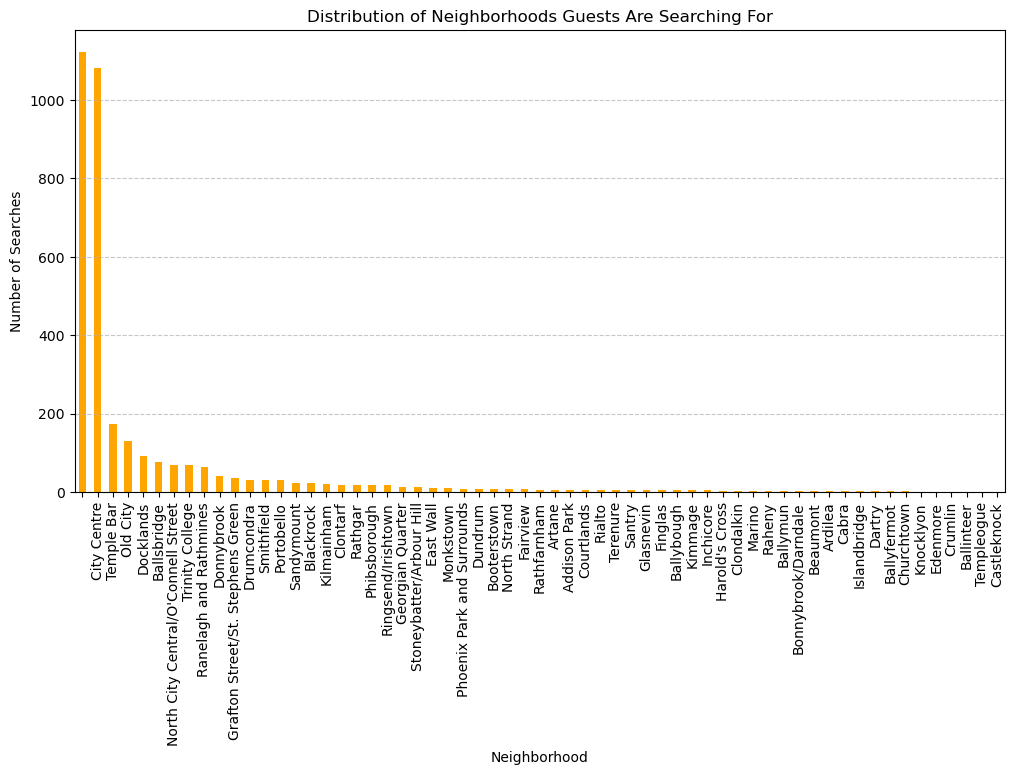

In [9]:
# count of the neighborhoods
neighborhoods_split = searches_df_cleaned['filter_neighborhoods'].dropna().str.split(',', expand=True).stack()
neighborhoods_distribution = neighborhoods_split.value_counts()


plt.figure(figsize=(12, 6))
neighborhoods_distribution.plot(kind='bar', color='orange')
plt.title('Distribution of Neighborhoods Guests Are Searching For')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Searches')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


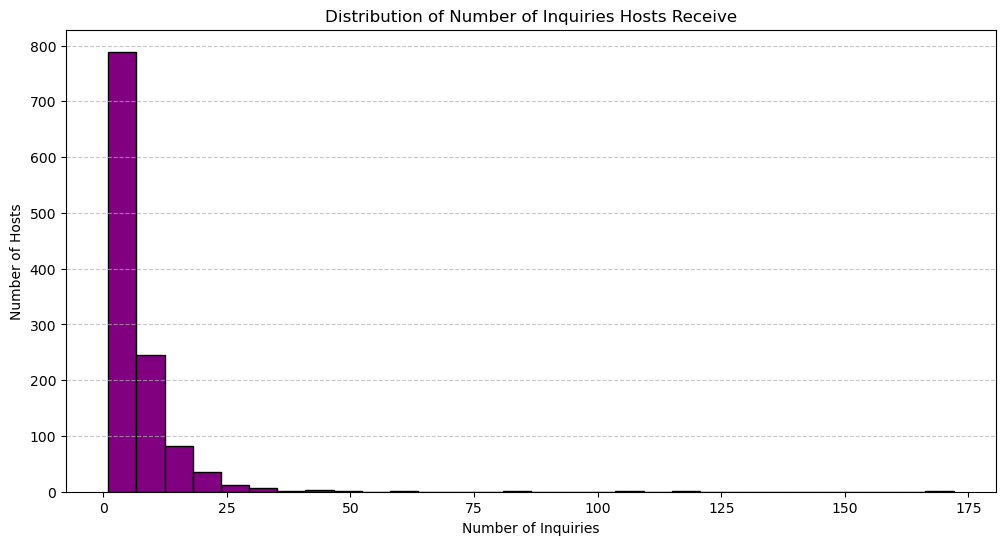

In [10]:
# number of inquiries each host receives
inquiries_per_host = contacts_df_cleaned['id_host'].value_counts()


plt.figure(figsize=(12, 6))
inquiries_per_host.plot(kind='hist', bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Number of Inquiries Hosts Receive')
plt.xlabel('Number of Inquiries')
plt.ylabel('Number of Hosts')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


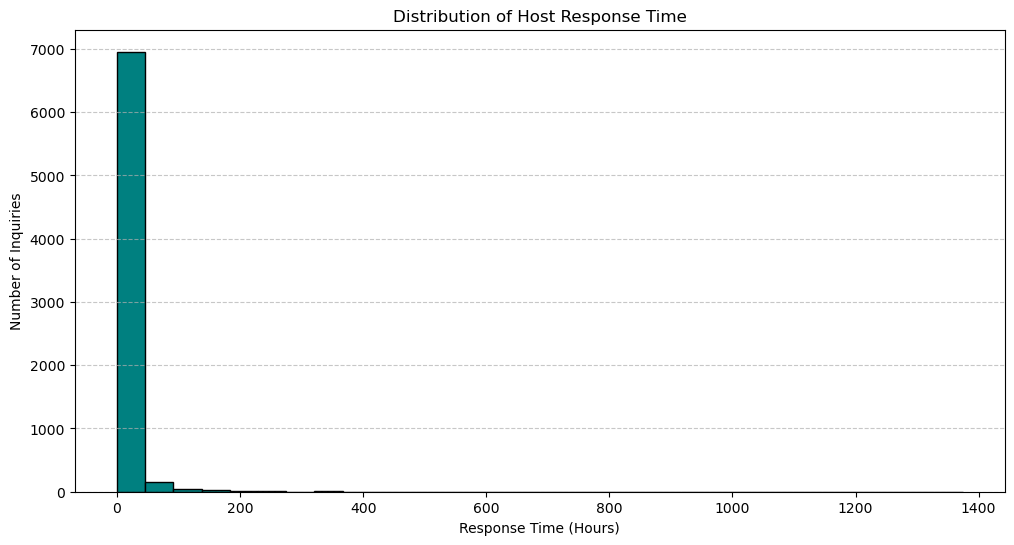

In [11]:
# response time in hours
contacts_df_cleaned['response_time_hours'] = (contacts_df_cleaned['ts_reply_at'] - contacts_df_cleaned['ts_contact_at']).dt.total_seconds() / 3600


plt.figure(figsize=(12, 6))
contacts_df_cleaned['response_time_hours'].dropna().plot(kind='hist', bins=30, color='teal', edgecolor='black')
plt.title('Distribution of Host Response Time')
plt.xlabel('Response Time (Hours)')
plt.ylabel('Number of Inquiries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


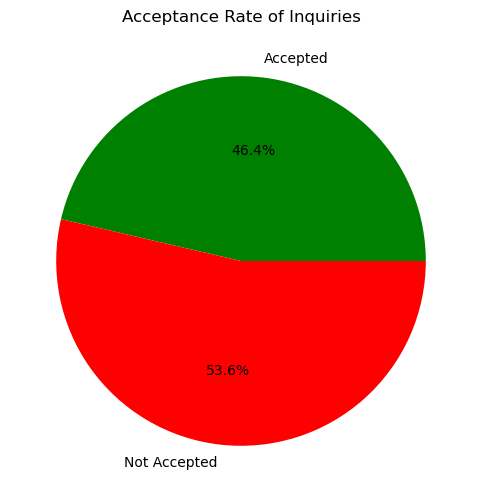

In [12]:
# acceptance rate
contacts_df_cleaned['accepted'] = contacts_df_cleaned['ts_accepted_at'].notna()
acceptance_rate = contacts_df_cleaned['accepted'].mean()


plt.figure(figsize=(6, 6))
plt.pie([acceptance_rate, 1 - acceptance_rate], labels=['Accepted', 'Not Accepted'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Acceptance Rate of Inquiries')
plt.show()


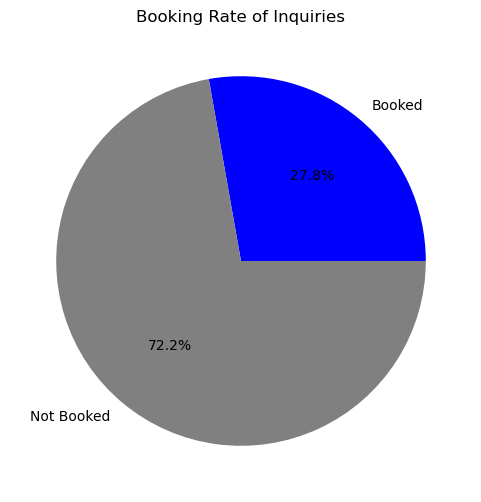

In [13]:
# booking rate
contacts_df_cleaned['booked'] = contacts_df_cleaned['ts_booking_at'].notna()
booking_rate = contacts_df_cleaned['booked'].mean()


plt.figure(figsize=(6, 6))
plt.pie([booking_rate, 1 - booking_rate], labels=['Booked', 'Not Booked'], autopct='%1.1f%%', colors=['blue', 'grey'])
plt.title('Booking Rate of Inquiries')
plt.show()


## Analysing gap

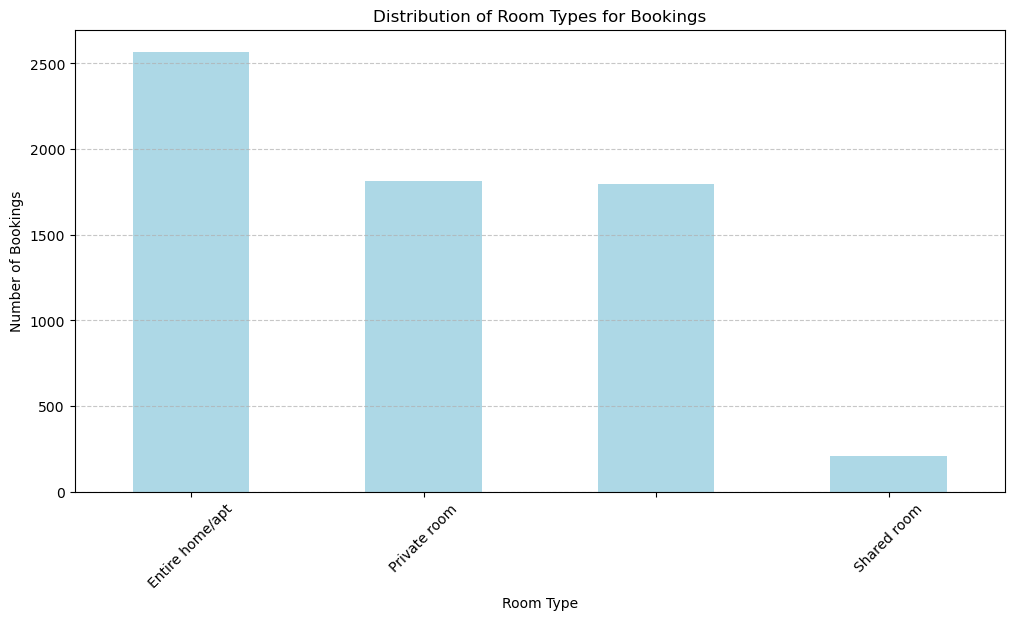

In [15]:
# room types from the contacts data that resulted in bookings
booked_contacts = contacts_df_cleaned[contacts_df_cleaned['booked']]
booked_room_types = booked_contacts.merge(searches_df_cleaned, how='inner', left_on='id_guest', right_on='id_user')['filter_room_types'].dropna()

# price ranges from the contacts data that resulted in bookings
booked_price_ranges = booked_contacts.merge(searches_df_cleaned, how='inner', left_on='id_guest', right_on='id_user')[['filter_price_min', 'filter_price_max']].dropna()

# neighborhoods from the contacts data that resulted in bookings
booked_neighborhoods = booked_contacts.merge(searches_df_cleaned, how='inner', left_on='id_guest', right_on='id_user')['filter_neighborhoods'].dropna()


booked_room_types_split = booked_room_types.str.split(',', expand=True).stack()



booked_room_types_split = booked_room_types.str.split(',', expand=True).stack()
booked_room_types_distribution = booked_room_types_split.value_counts()

plt.figure(figsize=(12, 6))
booked_room_types_distribution.plot(kind='bar', color='lightblue')
plt.title('Distribution of Room Types for Bookings')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



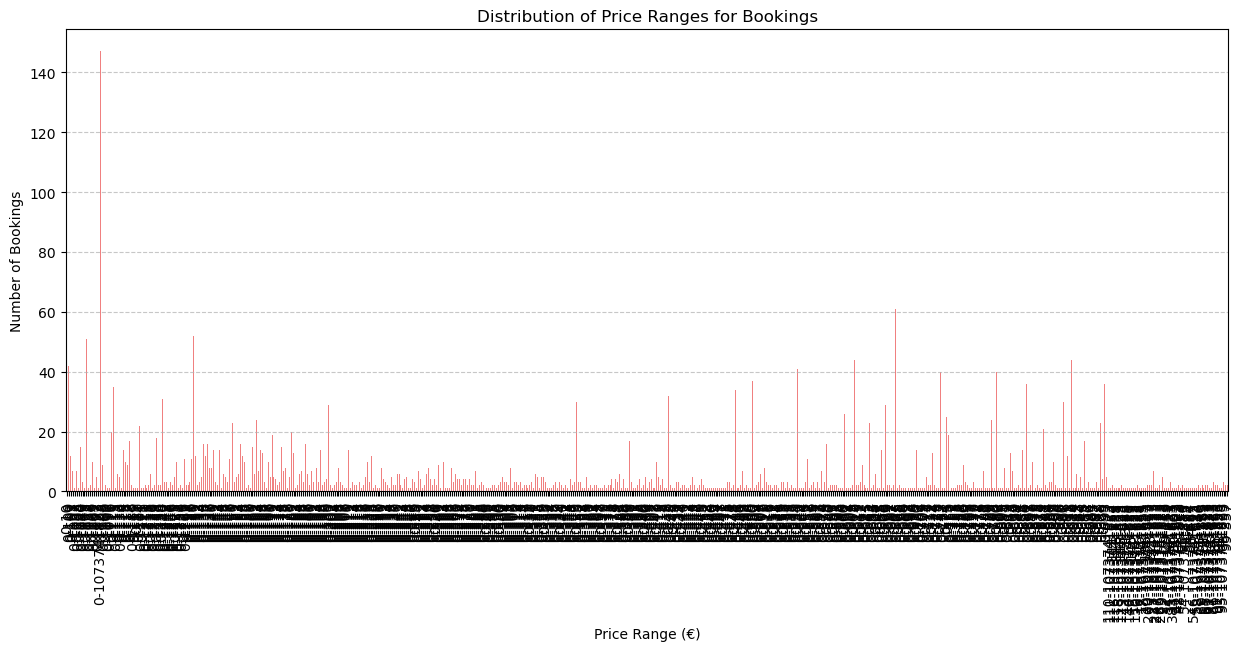

In [16]:
# the distribution of price ranges for bookings
booked_price_ranges['price_range'] = booked_price_ranges.apply(lambda x: f"{int(x['filter_price_min'])}-{int(x['filter_price_max'])}", axis=1)
booked_price_range_distribution = booked_price_ranges['price_range'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
booked_price_range_distribution.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Price Ranges for Bookings')
plt.xlabel('Price Range (€)')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


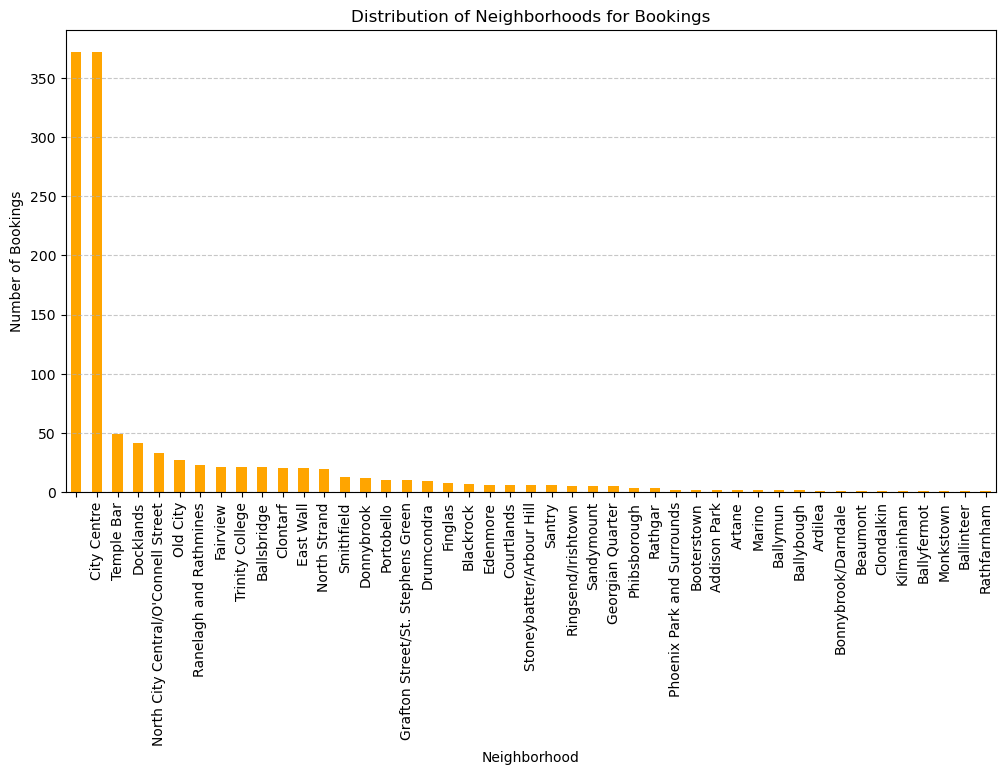

In [17]:
# neighborhoods for bookings
booked_neighborhoods_split = booked_neighborhoods.str.split(',', expand=True).stack()
booked_neighborhoods_distribution = booked_neighborhoods_split.value_counts()

plt.figure(figsize=(12, 6))
booked_neighborhoods_distribution.plot(kind='bar', color='orange')
plt.title('Distribution of Neighborhoods for Bookings')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\subramanya\AppData\Local\Temp\ipykernel_9976\2984472426.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  searches_with_price['price_range'] = searches_with_price.apply(


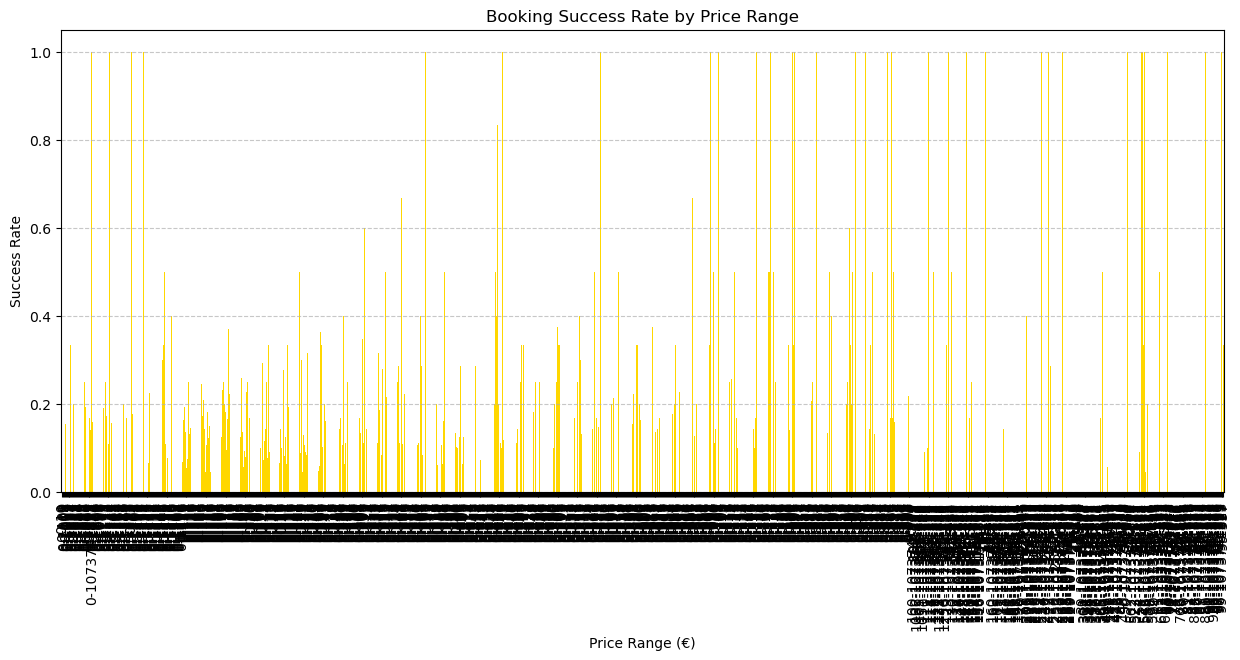

In [18]:
# Segment searches by price range
searches_with_price = searches_df_cleaned.dropna(subset=['filter_price_min', 'filter_price_max'])

# the price range
searches_with_price['price_range'] = searches_with_price.apply(
    lambda x: f"{int(x['filter_price_min'])}-{int(x['filter_price_max'])}", axis=1)

# Merge with contacts to determine booking success
searches_with_price = searches_with_price.merge(
    contacts_df_cleaned[['id_guest', 'booked']], 
    how='left', 
    left_on='id_user', 
    right_on='id_guest'
)

# booking success rate by price range
price_success_rate = searches_with_price.groupby('price_range').agg(
    total_inquiries=('booked', 'size'),
    successful_bookings=('booked', 'sum')
)

price_success_rate['success_rate'] = price_success_rate['successful_bookings'] / price_success_rate['total_inquiries']

# Sort by price range
price_success_rate = price_success_rate.sort_index()


plt.figure(figsize=(15, 6))
price_success_rate['success_rate'].plot(kind='bar', color='gold')
plt.title('Booking Success Rate by Price Range')
plt.xlabel('Price Range (€)')
plt.ylabel('Success Rate')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Extra insights

C:\Users\subramanya\AppData\Local\Temp\ipykernel_9976\3566957715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booked_contacts['checkin_month'] = booked_contacts['ds_checkin'].dt.month_name()


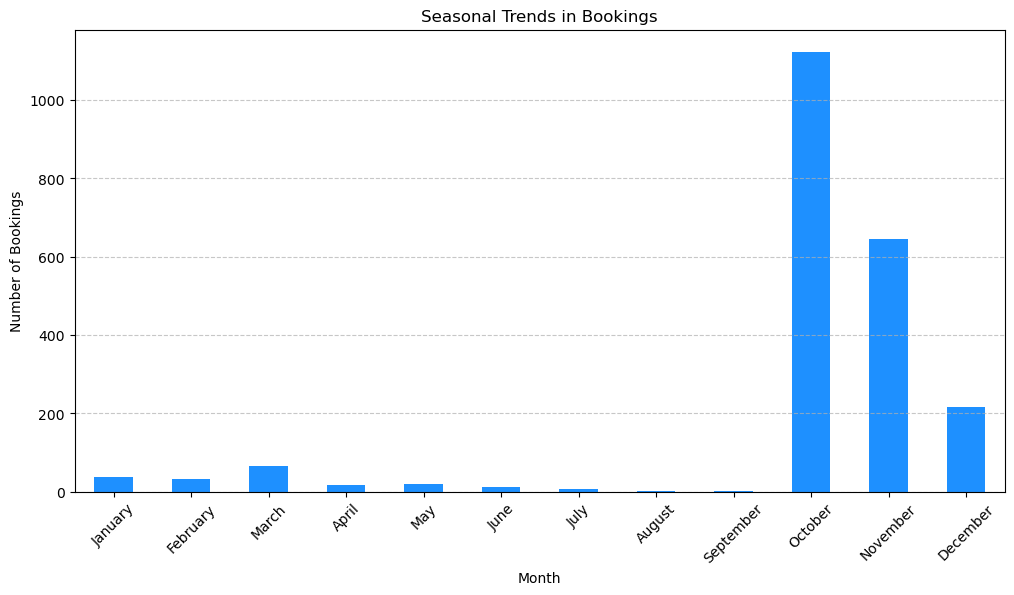

In [19]:
# the month from the check-in dates for bookings
booked_contacts['checkin_month'] = booked_contacts['ds_checkin'].dt.month_name()

# the number of bookings by month
monthly_bookings = booked_contacts['checkin_month'].value_counts().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 
     'July', 'August', 'September', 'October', 'November', 'December']
)


plt.figure(figsize=(12, 6))
monthly_bookings.plot(kind='bar', color='dodgerblue')
plt.title('Seasonal Trends in Bookings')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


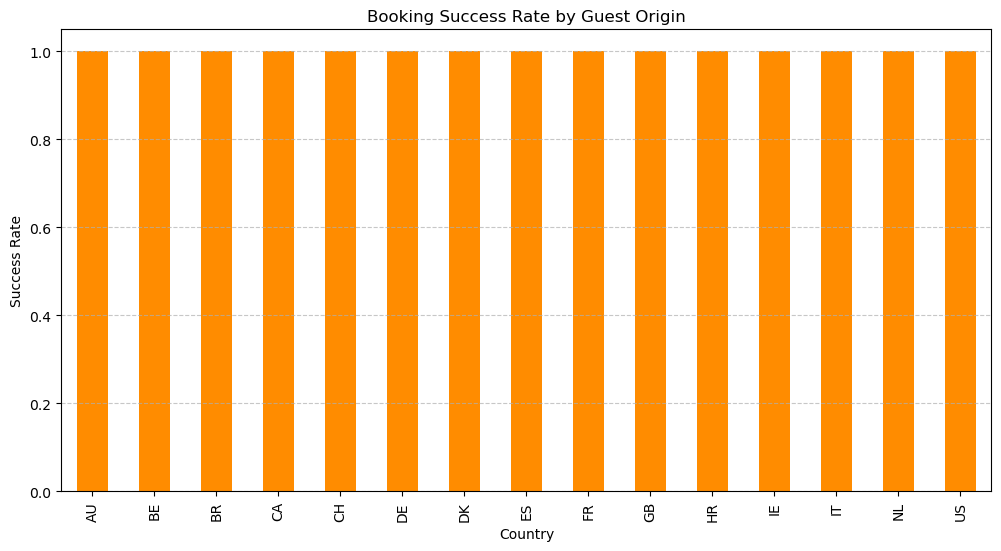

In [20]:
# the booking success rate by guest origin
merged_data = booked_contacts.merge(searches_df_cleaned, how='inner', left_on='id_guest', right_on='id_user')
booking_success_by_origin = merged_data.groupby('origin_country').agg(
    total_inquiries=('booked', 'size'),
    successful_bookings=('booked', 'sum')
)

booking_success_by_origin['success_rate'] = booking_success_by_origin['successful_bookings'] / booking_success_by_origin['total_inquiries']

# Sort by success rate and filter for countries with a significant number of inquiries (at least 50)
booking_success_by_origin = booking_success_by_origin[booking_success_by_origin['total_inquiries'] >= 50].sort_values(by='success_rate', ascending=False)


plt.figure(figsize=(12, 6))
booking_success_by_origin['success_rate'].plot(kind='bar', color='darkorange')
plt.title('Booking Success Rate by Guest Origin')
plt.xlabel('Country')
plt.ylabel('Success Rate')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


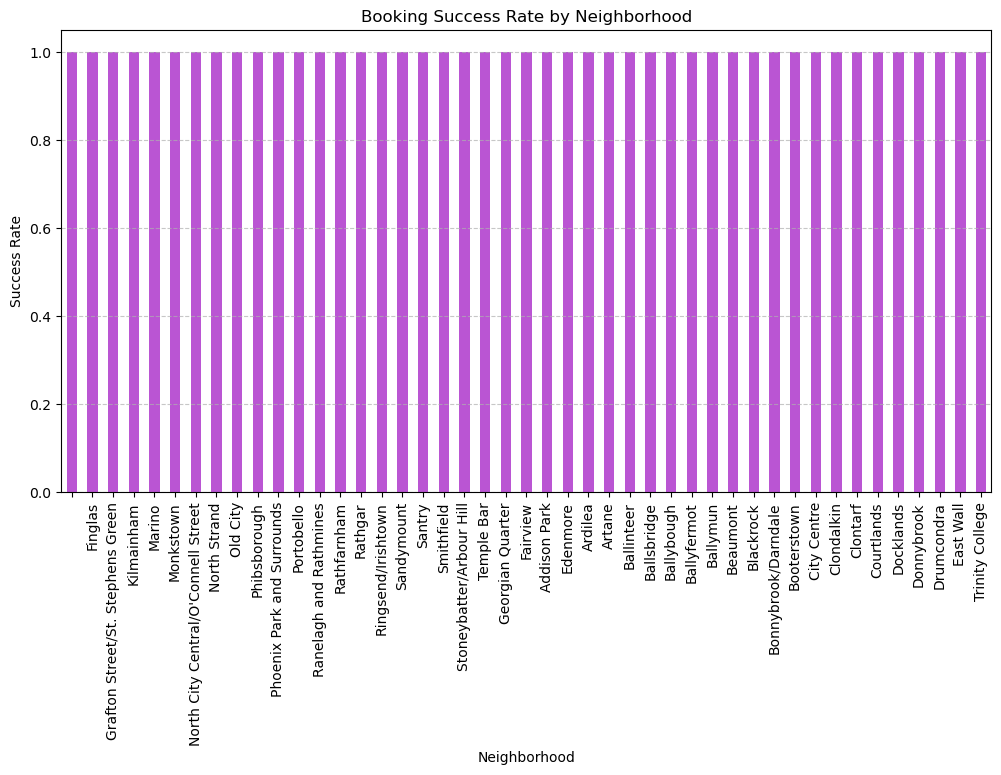

In [23]:
# the neighborhoods for inquiries that resulted in bookings
booked_neighborhoods = merged_data['filter_neighborhoods'].dropna()

# Split the neighborhoods into individual entries
booked_neighborhoods_split = booked_neighborhoods.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
booked_neighborhoods_split.name = 'neighborhood'

# Merge the neighborhood data back with the original data to get the booking success information
merged_data_with_neighborhoods = merged_data.join(booked_neighborhoods_split)

# the booking success rate by neighborhood
booking_success_by_neighborhood = merged_data_with_neighborhoods.groupby('neighborhood').agg(
    total_inquiries=('booked', 'size'),
    successful_bookings=('booked', 'sum')
)

booking_success_by_neighborhood['success_rate'] = booking_success_by_neighborhood['successful_bookings'] / booking_success_by_neighborhood['total_inquiries']


booking_success_by_neighborhood = booking_success_by_neighborhood.sort_values(by='success_rate', ascending=False)


plt.figure(figsize=(12, 6))
booking_success_by_neighborhood['success_rate'].plot(kind='bar', color='mediumorchid')
plt.title('Booking Success Rate by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Success Rate')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [24]:
# Summary table for searches by day of the week
searches_by_day_summary = searches_df_cleaned['checkin_day_of_week'].value_counts().sort_index().reset_index()
searches_by_day_summary.columns = ['Day of the Week', 'Number of Searches']
searches_by_day_summary


,Day of the Week,Number of Searches
0,Friday,5966
1,Monday,3179
2,Saturday,4465
3,Sunday,2081
4,Thursday,3321
5,Tuesday,2371
6,Wednesday,2505


In [25]:
# Summary table for number of nights guests are searching for
nights_summary = searches_df_cleaned['n_nights'].value_counts().sort_index().reset_index()
nights_summary.columns = ['Number of Nights', 'Number of Searches']
nights_summary


,Number of Nights,Number of Searches
0,0.0,5
1,1.0,3555
2,2.0,5121
3,3.0,4947
4,4.0,3091
...,...,...
202,370.0,1
203,378.0,1
204,383.0,1
205,392.0,2


In [26]:
# Summary table for room types
room_types_summary = room_types_distribution.reset_index()
room_types_summary.columns = ['Room Type', 'Number of Searches']
room_types_summary


,Room Type,Number of Searches
0,Entire home/apt,12336
1,,8238
2,Private room,6255
3,Shared room,1032


In [27]:
# Summary table for price ranges
price_range_summary = price_range_distribution.reset_index()
price_range_summary.columns = ['Price Range (€)', 'Number of Searches']
price_range_summary


,Price Range (€),Number of Searches
0,0-10,5
1,0-100,170
2,0-1002,2
3,0-1008,1
4,0-101,30
...,...,...
1217,97-1073741823,1
1218,98-1073741823,2
1219,98-299,2
1220,99-1073741823,4


In [28]:
# Summary table for top 20 origin countries
origin_country_summary = origin_country_distribution.reset_index()
origin_country_summary.columns = ['Country', 'Number of Searches']
origin_country_summary


,Country,Number of Searches
0,US,4009
1,IE,3744
2,GB,3309
3,FR,2534
4,IT,1625
5,DE,1481
6,ES,1235
7,CA,697
8,AU,621
9,NL,593


In [29]:
# Summary table for neighborhoods
neighborhoods_summary = neighborhoods_distribution.reset_index()
neighborhoods_summary.columns = ['Neighborhood', 'Number of Searches']
neighborhoods_summary


,Neighborhood,Number of Searches
0,,1122
1,City Centre,1081
2,Temple Bar,174
3,Old City,130
4,Docklands,91
...,...,...
56,Edenmore,1
57,Crumlin,1
58,Ballinteer,1
59,Templeogue,1


In [30]:
# Summary table for number of inquiries hosts receive
inquiries_per_host_summary = inquiries_per_host.describe().reset_index()
inquiries_per_host_summary.columns = ['Statistic', 'Number of Inquiries']
inquiries_per_host_summary


,Statistic,Number of Inquiries
0,count,1184.000000
1,mean,6.607264
2,std,10.019270
3,min,1.000000
4,25%,2.000000
5,50%,4.000000
6,75%,8.000000
7,max,172.000000


In [31]:
# Summary table for host response time
response_time_summary = contacts_df_cleaned['response_time_hours'].describe().reset_index()
response_time_summary.columns = ['Statistic', 'Response Time (Hours)']
response_time_summary


,Statistic,Response Time (Hours)
0,count,7219.000000
1,mean,9.654456
2,std,35.281122
3,min,0.000000
4,25%,0.255556
5,50%,1.709444
6,75%,9.067222
7,max,1373.803056


In [32]:
# Summary table for acceptance rate
acceptance_rate_summary = pd.DataFrame({
    'Status': ['Accepted', 'Not Accepted'],
    'Proportion': [acceptance_rate, 1 - acceptance_rate]
})
acceptance_rate_summary


,Status,Proportion
0,Accepted,0.463633
1,Not Accepted,0.536367


In [33]:
# Summary table for booking rate
booking_rate_summary = pd.DataFrame({
    'Status': ['Booked', 'Not Booked'],
    'Proportion': [booking_rate, 1 - booking_rate]
})
booking_rate_summary


,Status,Proportion
0,Booked,0.277899
1,Not Booked,0.722101


In [34]:
# Summary table for seasonal trends in bookings
seasonal_bookings_summary = monthly_bookings.reset_index()
seasonal_bookings_summary.columns = ['Month', 'Number of Bookings']
seasonal_bookings_summary


,Month,Number of Bookings
0,January,36
1,February,33
2,March,64
3,April,17
4,May,20
5,June,11
6,July,6
7,August,2
8,September,2
9,October,1124


In [35]:
# Summary table for booking success rate by guest origin
booking_success_by_origin_summary = booking_success_by_origin.reset_index()
booking_success_by_origin_summary.columns = ['Country', 'Total Inquiries', 'Successful Bookings', 'Success Rate']
booking_success_by_origin_summary


,Country,Total Inquiries,Successful Bookings,Success Rate
0,AU,145,145,1.0
1,BE,98,98,1.0
2,BR,58,58,1.0
3,CA,210,210,1.0
4,CH,133,133,1.0
5,DE,369,369,1.0
6,DK,52,52,1.0
7,ES,252,252,1.0
8,FR,703,703,1.0
9,GB,738,738,1.0


In [37]:
# Summary table for price sensitivity analysis
price_success_rate_summary = price_success_rate.reset_index()
price_success_rate_summary.columns = ['Price Range (€)', 'Total Inquiries', 'Successful Bookings', 'Success Rate']
price_success_rate_summary


,Price Range (€),Total Inquiries,Successful Bookings,Success Rate
0,0-10,5,True,0.2
1,0-100,246,42,0.170732
2,0-1002,2,0,0.0
3,0-1008,1,0,0.0
4,0-101,78,12,0.153846
...,...,...,...,...
1217,97-1073741823,1,0,0.0
1218,98-1073741823,2,0,0.0
1219,98-299,2,2,1.0
1220,99-1073741823,4,False,0.0


In [38]:
# Summary table for booking success by neighborhood
booking_success_by_neighborhood_summary = booking_success_by_neighborhood.reset_index()
booking_success_by_neighborhood_summary.columns = ['Neighborhood', 'Total Inquiries', 'Successful Bookings', 'Success Rate']
booking_success_by_neighborhood_summary


,Neighborhood,Total Inquiries,Successful Bookings,Success Rate
0,,372,372,1.0
1,Finglas,8,8,1.0
2,Grafton Street/St. Stephens Green,10,10,1.0
3,Kilmainham,1,1,1.0
4,Marino,2,2,1.0
5,Monkstown,1,1,1.0
6,North City Central/O'Connell Street,33,33,1.0
7,North Strand,19,19,1.0
8,Old City,27,27,1.0
9,Phibsborough,3,3,1.0
